In [1]:
import json
from daily51.wht.kyw import *
snapf = get_file_snapshot()


In [2]:
len(snapf)

136732

In [3]:
import json
with open("C:/dat/walk20220817.json", "w") as f:
    jstring = json.dumps(snapf)
    f.write(jstring)

In [10]:
import os
import psutil
data = []
for root, dirs, files in os.walk("C:\\"):
    data.append([root, len(dirs), len(files)])
len(data)

212728

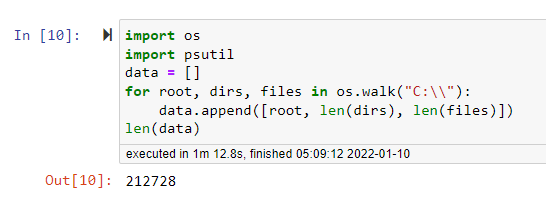

In [17]:
# import json
# with open("C:/dat/walk20220110.json", "w") as f:
#     jstring = json.dumps(data)
#     f.write(jstring)

In [23]:
import numpy as np
y = np.arange(101, 125)
np.stack([y, y**.5], axis=1)

array([[101.        ,  10.04987562],
       [102.        ,  10.09950494],
       [103.        ,  10.14889157],
       [104.        ,  10.19803903],
       [105.        ,  10.24695077],
       [106.        ,  10.29563014],
       [107.        ,  10.34408043],
       [108.        ,  10.39230485],
       [109.        ,  10.44030651],
       [110.        ,  10.48808848],
       [111.        ,  10.53565375],
       [112.        ,  10.58300524],
       [113.        ,  10.63014581],
       [114.        ,  10.67707825],
       [115.        ,  10.72380529],
       [116.        ,  10.77032961],
       [117.        ,  10.81665383],
       [118.        ,  10.86278049],
       [119.        ,  10.90871211],
       [120.        ,  10.95445115],
       [121.        ,  11.        ],
       [122.        ,  11.04536102],
       [123.        ,  11.09053651],
       [124.        ,  11.13552873]])

In [46]:
# source: https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/356516/
proc_tags = [
    "name", # p.name()  #程序名
    "exe", # p.exe()  #程序的bin路徑
#     "cwd", # p.cwd()  #程序的工作目錄絕對路徑
    "status", # p.status()  #程序狀態
    "create_time", # p.create_time() #程序建立時間
#     "uids", # p.uids()  #程序uid資訊
#     "gids", # p.gids()  #程序的gid資訊
    "cpu_times", # p.cpu_times()  #程序的cpu時間資訊,包括user,system兩個cpu資訊
    "cpu_affinity", # p.cpu_affinity() #get程序cpu親和度,如果要設定cpu親和度,將cpu號作為參考就好
    "cpu_percent", # 
    "memory_percent", # p.memory_percent() #程序記憶體利用率
    "memory_info", # p.memory_info()  #程序記憶體rss,vms資訊
    "io_counters", # p.io_counters()  #程序的IO資訊,包括讀寫IO數字及引數
    "num_threads", # p.num_threads() #程序開啟的執行緒數
]

data = []
for proc in psutil.process_iter():
    try:
        pid = proc.pid
        row = {"pid": pid}
        for tag in proc_tags:
            row[tag] = str(eval(f"proc.{tag}()"))
        data.append(row)
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess) as e:
        print("!!! EXCEPTION !!!")
        print(e)
len(data)

!!! EXCEPTION !!!
psutil.AccessDenied (pid=0, name='System Idle Process')


325

In [45]:
# import json
# with open("C:/dat/proc20220110.json", "w") as f:
#     jstring = json.dumps(data)
#     f.write(jstring)

In [43]:
import json
print(json.dumps(data, indent=1))

[
 {
  "pid": 4,
  "name": "System",
  "exe": "",
  "status": "running",
  "create_time": "1641375378.854512",
  "cpu_times": "pcputimes(user=0.0, system=16523.46875, children_user=0.0, children_system=0.0)",
  "cpu_affinity": "[0, 1, 2, 3, 4, 5, 6, 7]",
  "memory_percent": "0.05090726694597674",
  "memory_info": "pmem(rss=8638464, vms=221184, num_page_faults=124183, peak_wset=19832832, wset=8638464, peak_paged_pool=0, paged_pool=0, peak_nonpaged_pool=272, nonpaged_pool=272, pagefile=221184, peak_pagefile=266240, private=221184)",
  "io_counters": "pio(read_count=1974, write_count=80485, read_bytes=71455585, write_bytes=8694756757, other_count=874520, other_bytes=18170085)",
  "num_threads": "319"
 },
 {
  "pid": 72,
  "name": "",
  "exe": "",
  "status": "stopped",
  "create_time": "1641375375.5323005",
  "cpu_times": "pcputimes(user=0.0, system=0.0, children_user=0.0, children_system=0.0)",
  "cpu_affinity": "[0, 1, 2, 3, 4, 5, 6, 7]",
  "memory_percent": "0.0005310383465203833",
  "

In [38]:
proc_tags = [
    "name", # p.name()  #程序名
    "exe", # p.exe()  #程序的bin路徑
    "cwd", # p.cwd()  #程序的工作目錄絕對路徑
    "status", # p.status()  #程序狀態
    "create_time", # p.create_time() #程序建立時間
    "uids", # p.uids()  #程序uid資訊
    "gids", # p.gids()  #程序的gid資訊
    "cpu_times", # p.cpu_times()  #程序的cpu時間資訊,包括user,system兩個cpu資訊
    "cpu_affinity", # p.cpu_affinity() #get程序cpu親和度,如果要設定cpu親和度,將cpu號作為參考就好
    "memory_percent", # p.memory_percent() #程序記憶體利用率
    "memory_info", # p.memory_info()  #程序記憶體rss,vms資訊
    "io_counters", # p.io_counters()  #程序的IO資訊,包括讀寫IO數字及引數
    "num_threads", # p.num_threads() #程序開啟的執行緒數
]

In [37]:
x = proc.memory_info()
print(str(x))

pmem(rss=8622080, vms=10530816, num_page_faults=4785, peak_wset=17842176, wset=8622080, peak_paged_pool=151208, paged_pool=143192, peak_nonpaged_pool=17112, nonpaged_pool=15040, pagefile=10530816, peak_pagefile=10645504, private=10530816)
